In [1]:
import pyhf
import emcee
import numpy as np
import matplotlib.pyplot as plt
import corner
%matplotlib inline

In [2]:
class EmceeWrapper(object):
    def __init__(self,model):
        self.model = model

    def prior(self,pars):
        mu    = pars[...,0]
        gamma = pars[...,1]
        factor = self.model.constraint_model.constraints_poisson.batched_factors[0]
        prob   = pyhf.probability.Poisson(1*factor)
        return np.where(
            mu<0,-np.inf,prob.log_prob(gamma*factor) + np.log( factor )
        )

    def lhood(self,pars,data):
         return self.model.main_model.logpdf(
            np.asarray(data),
            np.asarray(pars)
        )


    def lhood_times_prior(self,pars,x):
        return self.lhood(pars,x) + self.prior(pars)

In [3]:
w = EmceeWrapper(
    pyhf.simplemodels.hepdata_like([10],[50],[5])
)

p0 = 1+np.random.rand(4,2)
sampler = emcee.EnsembleSampler(4, 2, w.lhood_times_prior, args=[90])
results = sampler.run_mcmc(p0, 10000)
flat_samples = sampler.get_chain(discard=500, flat=True)

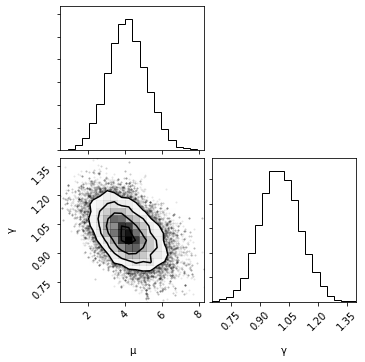

In [4]:
figure = corner.corner(flat_samples, labels = ['µ','γ'])

(0, 10)

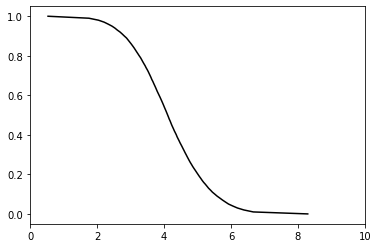

In [5]:
x = np.linspace(0,1,101)
y = [
    np.percentile(flat_samples[:,0],100*(1-xx)) for xx in x
]
plt.plot(y,x, label = 'hello', c = 'k')
plt.xlim(0,10)